# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [3]:
df = pd.read_csv("../Threads-Review/threads_reviews.csv")

In [4]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [5]:
df.shape

(32910, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [7]:
df.describe()

,rating
count,32910.000000
mean,3.398481
std,1.751480
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
df['source'].value_counts()

Google Play    30270
App Store       2640
Name: source, dtype: int64

In [9]:
df['rating'].describe()

count    32910.000000
mean         3.398481
std          1.751480
min          1.000000
25%          1.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [10]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [11]:
df[df.duplicated]

,source,review_description,rating,review_date
31351,App Store,We will get together tomorrow,5,2023-07-21 07:33:34


In [12]:
# 1 row of duplicated data, it can be dropped

In [13]:
df = df.drop_duplicates()

# EDA

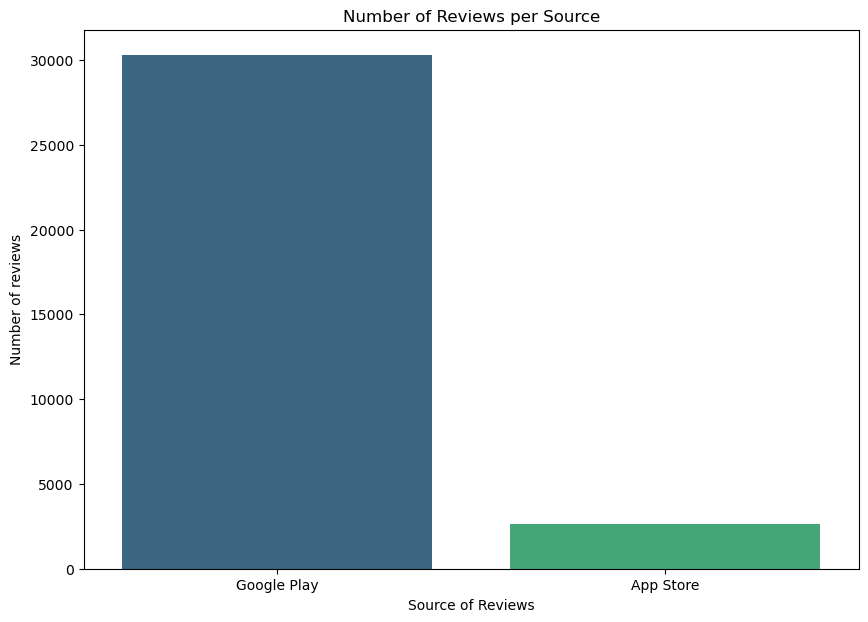

In [14]:
plt.figure(figsize=(10, 7))
sns.countplot(df, x='source', palette='viridis')
plt.xlabel('Source of Reviews')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews per Source');

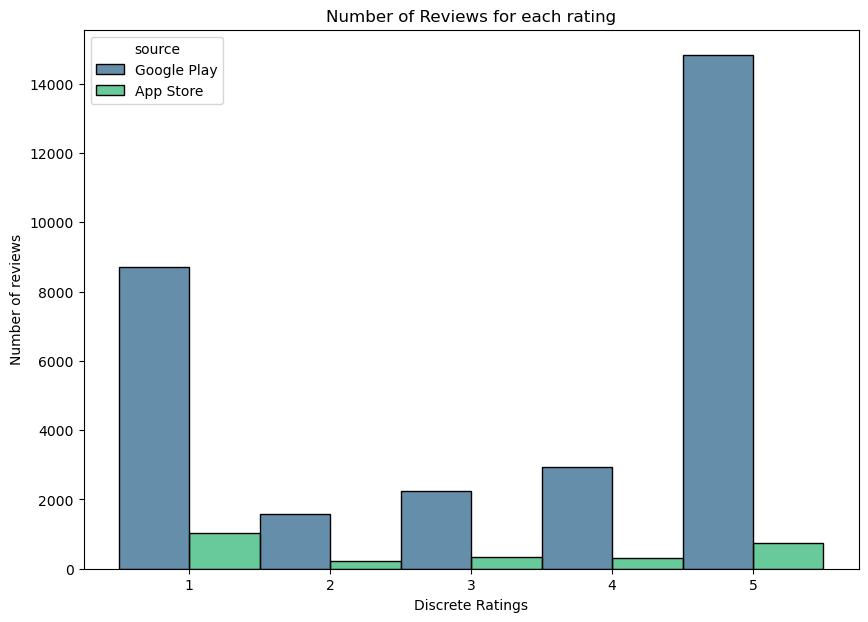

In [15]:
plt.figure(figsize=(10, 7))
sns.histplot(df, x='rating', hue='source', multiple='dodge', discrete=True, palette='viridis')
plt.xlabel('Discrete Ratings')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews for each rating');

In [16]:
#Most reviews are from Google Playstore

In [17]:
df_feat = df
df_feat['review_date'] = pd.to_datetime(df_feat['review_date'])

df_feat['day'] = df_feat['review_date'].dt.day
df_feat['day_of_the_week'] = df_feat['review_date'].dt.day_name()
df_feat['week'] = df_feat['review_date'].dt.isocalendar().week
df_feat['month'] = df_feat['review_date'].dt.month_name()

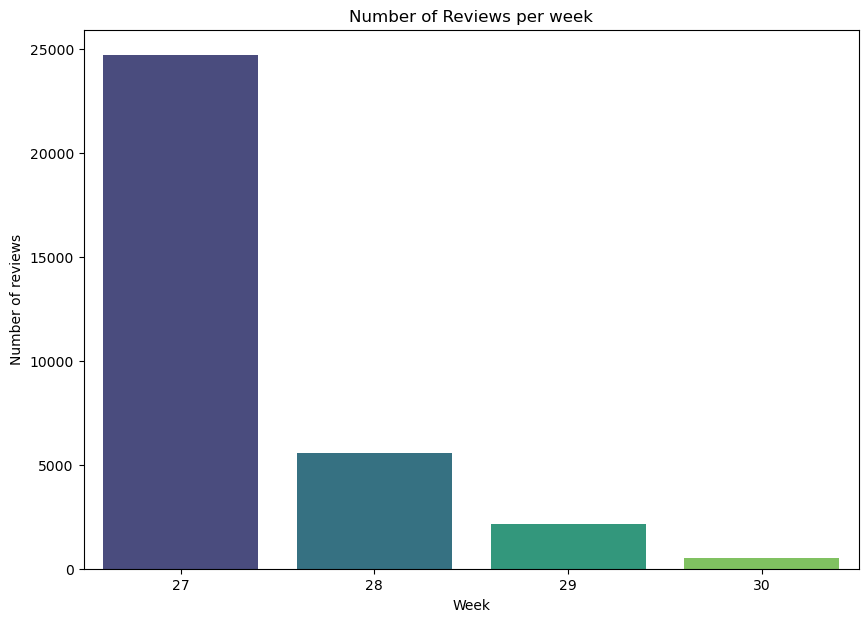

In [18]:
plt.figure(figsize=(10, 7))
sns.countplot(df_feat, x='week', palette='viridis')
plt.xlabel('Week')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews per week');

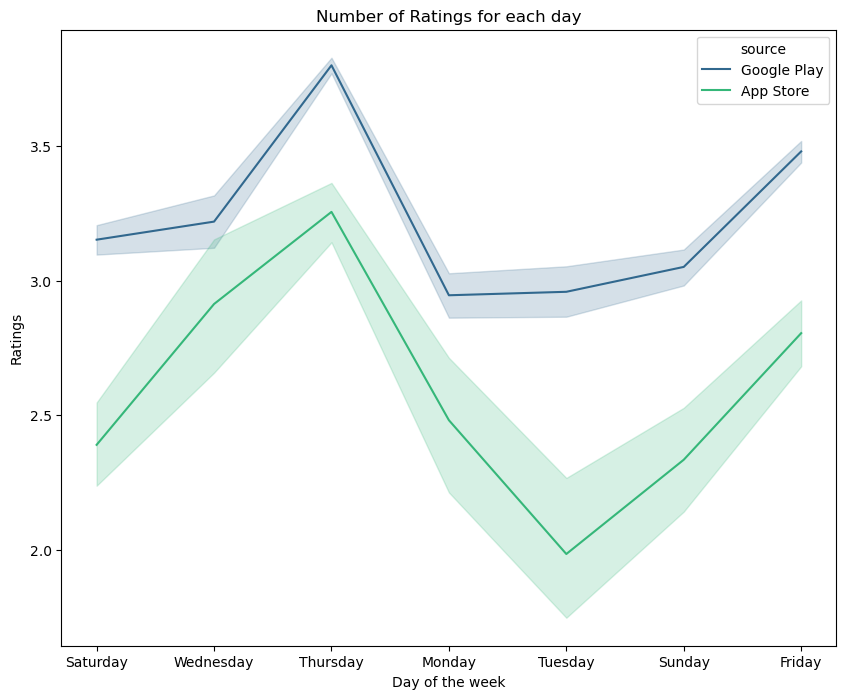

In [19]:
plt.figure(figsize=(10, 8))
sns.lineplot(x = df_feat['day_of_the_week'] , y = df_feat['rating'], hue=df_feat['source'], palette='viridis')
plt.xlabel('Day of the week')
plt.ylabel('Ratings')
plt.title('Number of Ratings for each day');

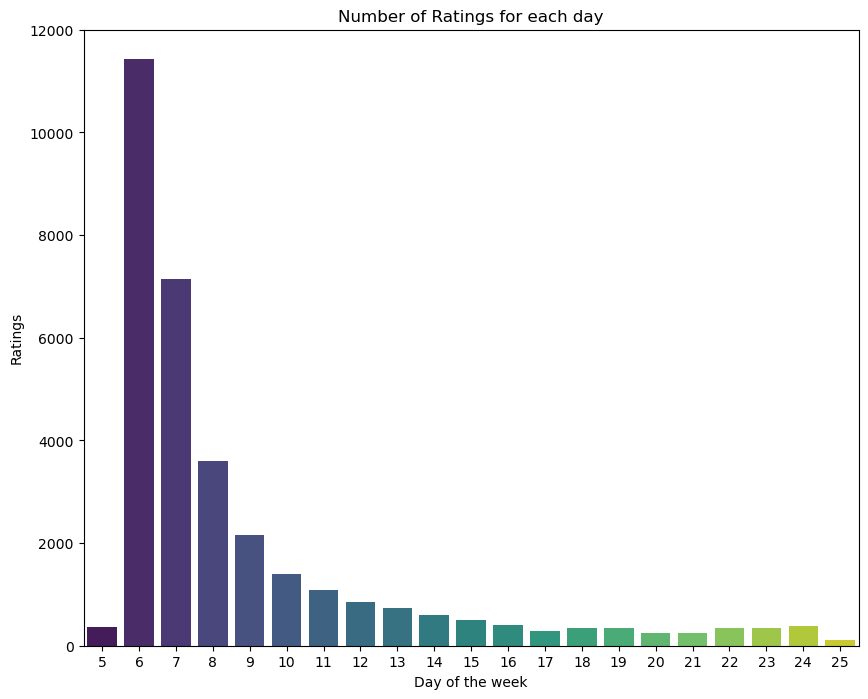

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(df_feat, x='day', palette='viridis')
plt.xlabel('Day of the week')
plt.ylabel('Ratings')
plt.title('Number of Ratings for each day');

## Process the reviews for vectorizing and tokenizing 

In [21]:
frequency_df = pd.DataFrame(pd.Series(' '.join(df_feat['review_description']).split()).value_counts()).reset_index()
frequency_df.columns = ['words', 'frequency']

In [22]:
frequency_df.head(10)

,words,frequency
0,to,10563
1,I,9707
2,the,9190
3,app,8076
4,and,7565
5,is,6823
6,a,6740
7,it,5584
8,of,4734
9,this,4076


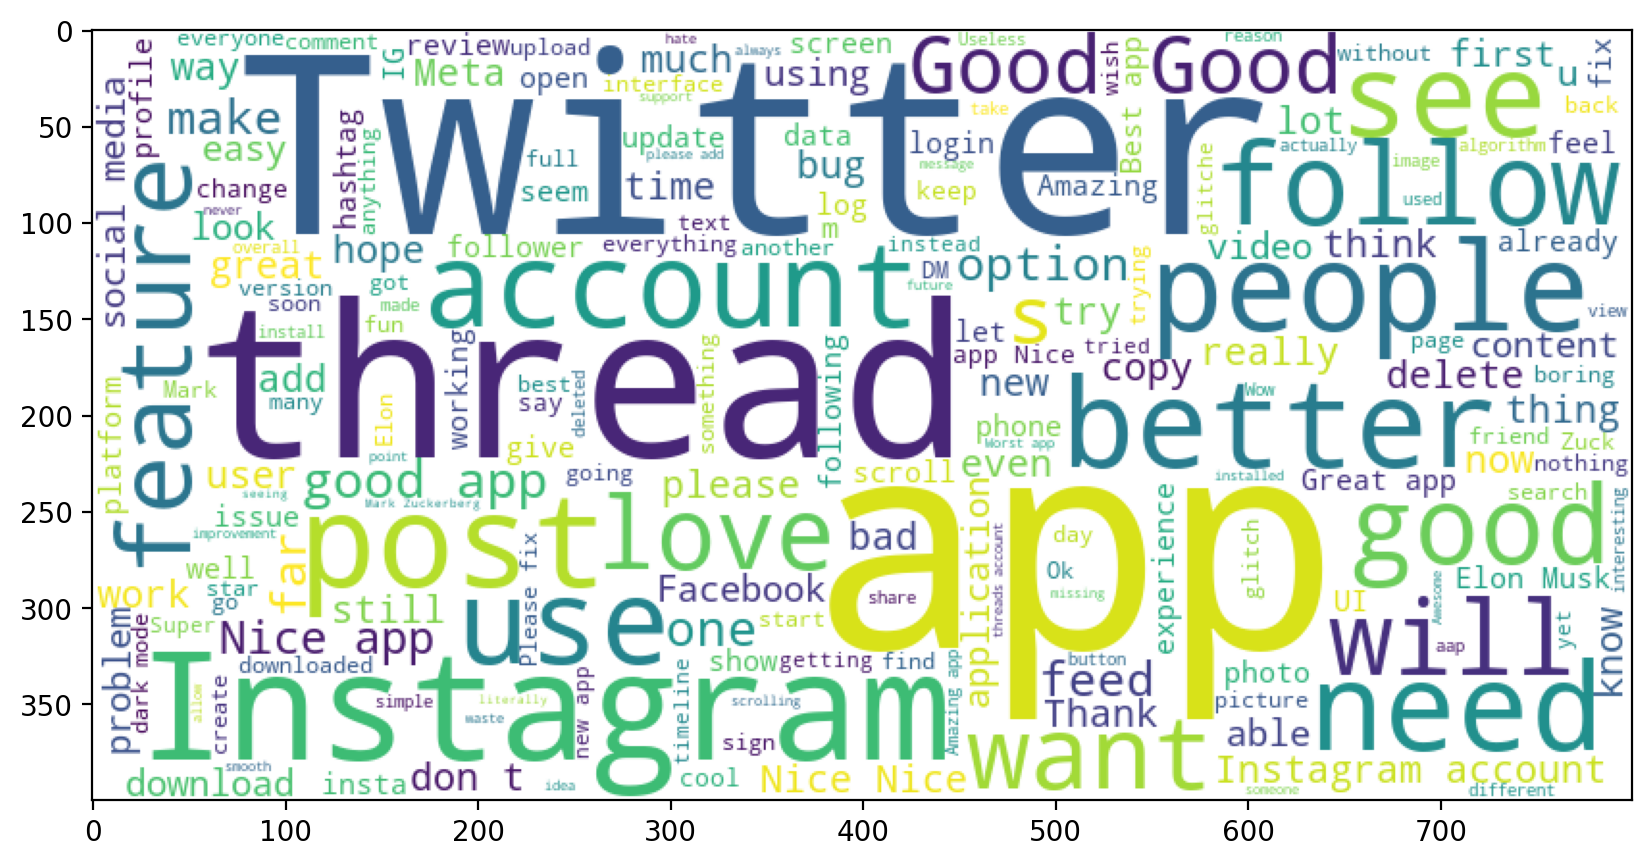

In [23]:
wordcloud = WordCloud(width=800, height=400, background_color='white',contour_color='steelblue').generate((' '.join(df_feat['review_description'])))

plt.figure(figsize=(10, 5), dpi=200)
plt.imshow(wordcloud);
